<a href="https://colab.research.google.com/github/ChanduDP/Python/blob/main/Glaxo%26BEML_Prob_Gain_or_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [3]:
#Loading BEML & GLAXO Files

BEML_DF = pd.read_csv("/content/BEML.csv")
GLAXO_DF = pd.read_csv("/content/GLAXO.csv")

In [9]:
#Loading Date and Close columns into  & GLAXO_DF

BEML_DF = BEML_DF[['Date','Close']]
GLAXO_DF = GLAXO_DF[['Date','Close']]


,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [13]:
#Making Date as a column index and it will ensure that date is sorted in ascending order

BEML_DF = BEML_DF.set_index(pd.DatetimeIndex(BEML_DF['Date']))
GLAXO_DF = GLAXO_DF.set_index(pd.DatetimeIndex(GLAXO_DF['Date']))

In [ ]:
#Plotting Close price for BEML_DF

plt.plot(BEML_DF['Close'])

In [ ]:
#Plotting Close price for GLAXO_DF

plt.plot(GLAXO_DF['Close'])
plt.show

In [24]:
#Calculating gain values for both

BEML_DF['Gain'] = BEML_DF['Close'].pct_change(periods = 1)
GLAXO_DF['Gain'] = GLAXO_DF['Close'].pct_change(periods = 1)

In [27]:
#Dropping NA values for both

BEML_DF = BEML_DF.dropna()
GLAXO_DF = GLAXO_DF.dropna()

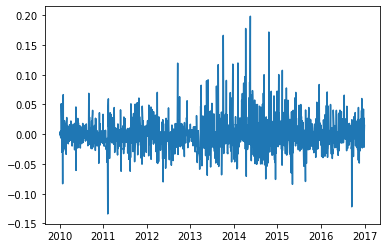

In [29]:
#Plotting Gain price for BEML_DF

plt.plot(BEML_DF['Gain'])

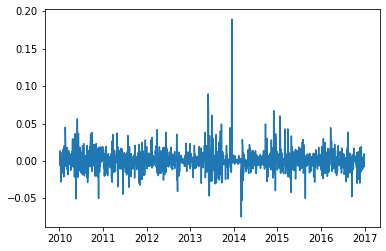

In [28]:
#Plotting Gain price for GLAXO_DF

plt.plot(GLAXO_DF['Gain'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


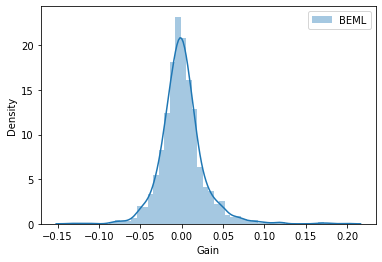

In [34]:
#Plotting Density plot for BEML_DF

sns.distplot(BEML_DF['Gain'], label = 'BEML')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


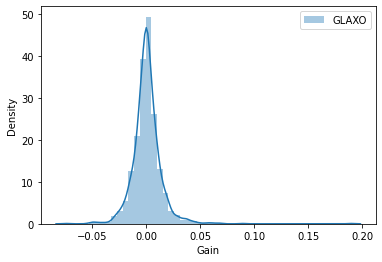

In [36]:
#Plotting Density plot for GLAXO_DF

sns.distplot(GLAXO_DF['Gain'], label = 'GLAXO')
plt.legend()

In [44]:
GLAXO_DF['Gain']

Date
2010-01-05   -0.005444
2010-01-06    0.013422
2010-01-07    0.006225
2010-01-08   -0.005398
2010-01-11   -0.006312
                ...   
2016-12-26   -0.001283
2016-12-27   -0.007986
2016-12-28    0.000148
2016-12-29    0.009529
2016-12-30    0.000697
Name: Gain, Length: 1738, dtype: float64

In [49]:
#Calculating Probability of 2% loss or higher BEML

stats.norm.cdf(0.04, loc = BEML_DF['Gain'].mean(), scale = BEML_DF['Gain'].std())

0.9335985851485303

In [45]:
#Calculating Probability of 2% Profit or higher BEML

1-stats.norm.cdf(-0.02, loc = BEML_DF['Gain'].mean(), scale = BEML_DF['Gain'].std())

0.7784401249624471

In [40]:
#Calculating Probability of 2% loss or higher GLAXO

stats.norm.cdf(-0.02, loc = GLAXO_DF['Gain'].mean(), scale = GLAXO_DF['Gain'].std())

0.06352488667177397

In [43]:
#Calculating Probability of 2% Profit or higher GLAXO

1-stats.norm.cdf(-0.02, loc = GLAXO_DF['Gain'].mean(), scale = GLAXO_DF['Gain'].std())

0.9364751133282261

In [52]:
#Confidence Interval for BEML - 90%

BEML_CI = stats.norm.interval(0.9, loc = BEML_DF['Gain'].mean(), scale = BEML_DF['Gain'].std() )
BEML_CI

(-0.043204100925206775, 0.04374559708332123)

In [53]:
#Confidence Interval for BEML - 95%

BEML_CI = stats.norm.interval(0.95, loc = BEML_DF['Gain'].mean(), scale = BEML_DF['Gain'].std() )
BEML_CI

(-0.051532729680601415, 0.05207422583871588)

In [60]:
#Confidence Interval for GLAXO - 90%

GLAXO_CI = stats.norm.interval(0.9, loc = GLAXO_DF['Gain'].mean(), scale = GLAXO_DF['Gain'].std() )
print('Gain at GLAXO - 90% is :' , np.round(GLAXO_CI, 4))

Gain at GLAXO - 90% is : [-0.0216  0.0224]


In [61]:
#Confidence Interval for GLAXO - 95%

GLAXO_CI = stats.norm.interval(0.95, loc = GLAXO_DF['Gain'].mean(), scale = GLAXO_DF['Gain'].std() )
print('Gain at GLAXO - 90% is :' , np.round(GLAXO_CI, 4))

Gain at GLAXO - 90% is : [-0.0258  0.0266]
